<a href="https://colab.research.google.com/github/villeraluis/ejerciciospy/blob/main/trabajo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
ds = scipy.io.loadmat('ds00')
x = ds['trainingx'].T
r = ds['trainingy'].T
test_x = ds['testx'].T
test_r = ds['testy'].T

In [ ]:
#regpar = 0 # Trainig RMSE: 0.15281658476501714, Test RMSE: 0.3012234378332885
#regpar = 0.000003 # Trainig RMSE: 0.1624916284927641, test RMSE: 0.28080731984291624
#regpar = 0.000007 # Trainig RMSE: 0.16680309787946065, test RMSE:0.27118590862939973
#regpar = 0.00001 # Trainig RMSE: 0.17067428337850957, test RMSE: 0.30415782524457463
#regpar = 0.00003 # Trainig RMSE: 0.16308522471450376, test RMSE: 0.28517242420770506
#regpar = 0.00007 # Trainig RMSE: 0.16598418476764182, test RMSE: 0.28300161289182163
#regpar = 0.0001 # Training RMSE:  0.17071271250452685, test RMSE: 0.2827009424115428
#regpar = 0.0003 # Training RMSE:  0.3487988746800508, test RMSE: 0.37016186136431867
#regpar = 0.0007 # Training RMSE:  0.8153462440226932, test RMSE: 0.8170859842949575
#regpar = 0.001 # Training RMSE:  0.4713112227068584, test RMSE: 0.5236640610608143
#regpar = 0.003 # Training RMSE:  0.3147207862458848, test RMSE: 0.39204217109577405
#regpar = 0.007 # Training RMSE:  0.36431667066260326, test RMSE: 0.4018456652713014
#regpar = 0.01 # Training RMSE:  0.5543924374393985, test RMSE: 0.5231944038231261
#regpar = 0.03 # Training RMSE:  0.7249972289931699, test RMSE: 0.7440885368588457
#regpar = 0.07 # Training RMSE:  0.4929397509893492, Test RMSE:  0.5430019364714461
#regpar = 0.1 # Training RMSE:  0.4853472482220793, Test RMSE:  0.5263030140920372
#regpar = 0.3 # Training RMSE:  6.660817370963671, Test RMSE:  5.896938899876748
#regpar = 0.7 # Training RMSE:  0.7952396637864328, Test RMSE:  0.8282726808121336
#regpar = 1 # Training RMSE:  0.6891412136645567, Test RMSE:  0.7312230849939961

 
X = np.concatenate((np.power(x, 0), np.power(x, 1), np.power(x, 2), 
                    np.power(x, 3),np.power(x, 4), 
                    np.power(x, 5), np.power(x, 6)), axis =1)
d = X.shape[1]

w = np.linalg.inv(X.T @ X - regpar * np.identity(d)) @ X.T @ r


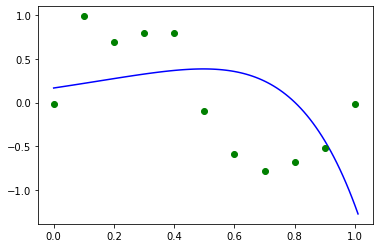

In [ ]:
xs = np.arange(0, 1.02, 0.01)
xs = xs.reshape(len(xs), 1)
Xs = np.concatenate((np.power(xs, 0), np.power(xs, 1), np.power(xs, 2), 
                    np.power(xs, 3),  np.power(xs, 4), 
                    np.power(xs, 5), np.power(xs, 6)), axis =1)
fig, ax = plt.subplots()
ax.plot(xs, Xs @ w, 'b-')
ax.plot(x, r, 'go')
plt.show()

In [ ]:
N = X.shape[0]
print('Training RMSE: ', math.sqrt((1 / N) * np.linalg.norm(X @ w - r)**2))

Training RMSE:  0.6891412136645567


In [ ]:
testX = np.concatenate((np.power(test_x, 0), np.power(test_x, 1),
                        np.power(test_x, 2), np.power(test_x, 3),
                        np.power(test_x, 4), np.power(test_x, 5),
                        np.power(test_x, 6)), axis =1)
testN = testX.shape[0]
print('Test RMSE: ', math.sqrt((1 / testN) * np.linalg.norm(testX @ w - test_r)**2))

Test RMSE:  0.7312230849939961


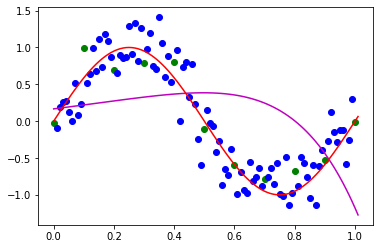

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, r, 'go', label=r'Training set')
ax.plot(test_x, test_r, 'bo', label=r'Test set')
ax.plot(xs, Xs @ w, 'm-', label=r'Prediction')
ax.plot(xs, np.sin(2 * math.pi * xs), 'r-', label=r'$r^{(t)} = sin(2 \pi x^{(t)})$')

In [ ]:
s = np.array([
              0.000003,
              0.000007,
              0.00001, 
              0.00003,
              0.00007,
              0.0001,
              0.0003, 
              0.0007,
              0.001,
              0.003,
              0.007,
              0.01,
              0.03,
              0.07,
              0.1,
              0.3,
              0.7,
              1])
 
t = np.array([0.15281658476501714,
0.1624916284927641,
0.16680309787946065,
0.17067428337850957,
0.16308522471450376,
0.16598418476764182,
0.17071271250452685,
0.3487988746800508,
0.8153462440226932,
0.4713112227068584,
0.3147207862458848,
0.36431667066260326,
0.5543924374393985,
0.7249972289931699,
0.4929397509893492,
0.4853472482220793,
6.660817370963671,
0.7952396637864328,
0.6891412136645567])


tr = np.array([0.3012234378332885,
0.28080731984291624,
0.27118590862939973,
0.30415782524457463,
0.28517242420770506,
0.28300161289182163,
0.2827009424115428,
0.37016186136431867,
0.8170859842949575,
0.5236640610608143,
0.39204217109577405,
0.4018456652713014,
0.5231944038231261,
0.7440885368588457,
0.5430019364714461,
0.5263030140920372,
5.896938899876748,
0.8282726808121336,
0.7312230849939961])

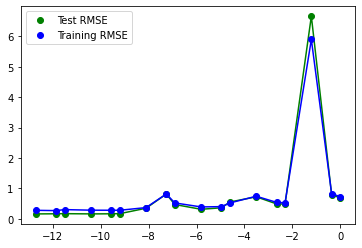

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.log(s), t, 'go', label='Test RMSE')
ax.plot(np.log(s), t, 'g-')
ax.plot(np.log(s), tr, 'bo', label='Training RMSE')
ax.plot(np.log(s), tr, 'b-')
ax.legend()
fig.show()

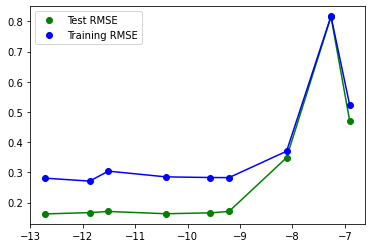

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.log(s[0:9]), t[0:9], 'go', label='Test RMSE')
ax.plot(np.log(s[0:9]), t[0:9], 'g-')
ax.plot(np.log(s[0:9]), tr[0:9], 'bo', label='Training RMSE')
ax.plot(np.log(s[0:9]), tr[0:9], 'b-')
ax.legend()
fig.show()